# 1. IMPORTING LIBRAIRIES

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 2. LOADING DATA

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# 3. CLEAN THE DATA

The data provided do not have a good encoding, we have to rename the title to access the columns without using the index.

In [4]:
df = df.rename(columns={df.columns[5]: 'Zip_Code', df.columns[6] : 'Lat_Long', 
                       df.columns[10] : 'Senior_Citizen',
                       df.columns[13] : 'Tenure_Months',
                       df.columns[14] : 'Phone_Service',
                       df.columns[15] : 'Multiple_Lines',
                       df.columns[16] : 'Internet_Service',
                       df.columns[17] : 'Online_Security',
                       df.columns[18] :'Online_Backup',
                       df.columns[19] : 'Device_Protection',
                       df.columns[20] : 'Tech_Support',
                       df.columns[21] : 'Streaming_TV',
                       df.columns[22] : 'Streaming_Movies',
                       df.columns[24] : 'Parless_Billing',
                       df.columns[25]: 'Payment_Method',
                       df.columns[26] : 'Monthly_Charges',
                       df.columns[27] : 'Total_Charges',
                       df.columns[28] : 'Churn_Label',
                       df.columns[29] : 'Churn_Value',
                       df.columns[30] : 'Churn_Score',
                       df.columns[32] : 'Churn_Reason'})

We have a lot of columns for this dataset so I rather like to print in one cell all unique value for each column.

In [5]:
i = 0
for col in df:
    print(df.columns[i])
    print(df[col].unique())
    i+=1

CustomerID
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Count
[1]
Country
['United States']
State
['California']
City
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Zip_Code
[90003 90005 90006 ... 96128 96134 96146]
Lat_Long
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Latitude
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Longitude
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Gender
['Male' 'Female']
Senior_Citizen
['No' 'Yes']
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
Tenure_Months
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Phone_Service
['Yes' 'No']
Mult

### A. DROP COLUMNS

We drop all columns which just have one value because it will not give us more information

In [6]:
i = 0
for col in df:
    unique = df[col].unique()
    if len(unique) == 1:
        print("Drop : " + df.columns[i])
        df = df.drop([col], axis=1)
    i+=1
      

Drop : Count
Drop : State
Drop : Zip_Code


I try to understand some link between churn value, churn label, churn score, CLTV and churn Reason

In [7]:
df.loc[df['Churn_Value'] == 0]

,CustomerID,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Contract,Parless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
1869,7590-VHVEG,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [8]:
df.loc[df['Churn_Value'] == 1]

,CustomerID,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Contract,Parless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,Palm Springs,92264,"33.745746, -116.514215",33.745746,-116.514215,Male,No,No,No,...,One year,Yes,Electronic check,59.80,727.8,Yes,1,69,4581,Competitor offered higher download speeds
1865,8775-CEBBJ,Seeley,92273,"32.790282, -115.689559",32.790282,-115.689559,Female,No,No,No,...,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,87,2029,Competitor offered higher download speeds
1866,6894-LFHLY,Vidal,92280,"34.264124, -114.717964",34.264124,-114.717964,Male,Yes,No,No,...,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1,97,5571,Competitor offered higher download speeds
1867,0639-TSIQW,White Water,92282,"33.972293, -116.654195",33.972293,-116.654195,Female,No,No,No,...,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,70,5620,Competitor offered more data


In [9]:
df.loc[(df['Churn_Value'] == 0) & (df['Churn_Label'] == 'Yes')]

,CustomerID,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Contract,Parless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason


So Churn Value is equal to Churn Label, I drop Churn Label

In [10]:
df = df.drop('Churn_Label', axis=1)

Our goal is to predict churn value, so I have to remove this column because it does not play a feature role but a description of Churn Value.

In [11]:
df = df.drop('Churn_Reason', axis=1)

Moreover, we can drop CustomerID it is not a feature

In [12]:
df = df.drop('CustomerID', axis=1)

Now we want to see if geolocalisation plays a big role for the churn value

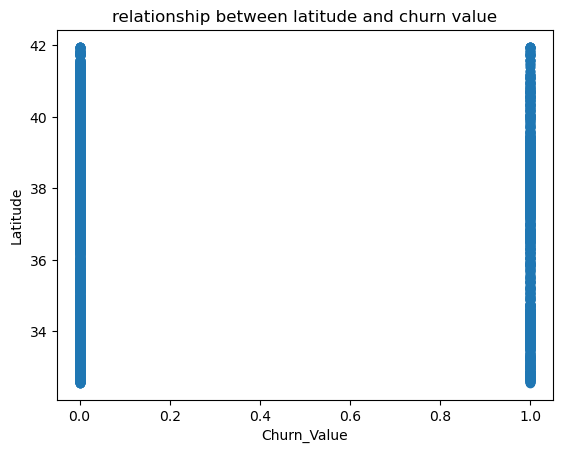

In [13]:
plt.scatter(df['Churn_Value'], df['Latitude'])
plt.title('relationship between latitude and churn value')
plt.xlabel('Churn_Value')
plt.ylabel('Latitude')
plt.show()

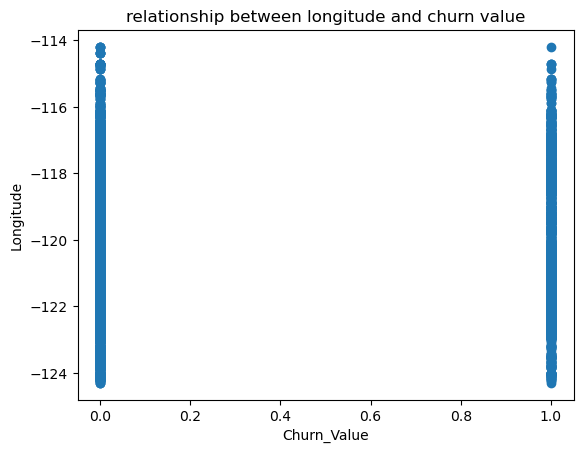

In [14]:
plt.scatter(df['Churn_Value'], df['Longitude'])
plt.title('relationship between longitude and churn value')
plt.xlabel('Churn_Value')
plt.ylabel('Longitude')
plt.show()

In [15]:
df = df.drop(['Lat_Long', 'Latitude', 'Longitude'], axis=1)

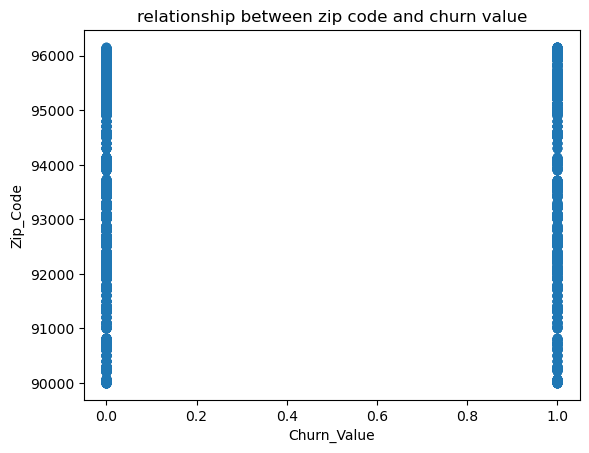

In [16]:
plt.scatter(df['Churn_Value'], df['Zip_Code'])
plt.title('relationship between zip code and churn value')
plt.xlabel('Churn_Value')
plt.ylabel('Zip_Code')
plt.show()

In [17]:
df = df.drop('Zip_Code', axis=1)

I choose to delete City to, geolocalisation don't seem to be a feature

In [18]:
df = df.drop('City', axis=1)

### B. CONVERT DATATYPE

In [19]:
df.dtypes

Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Parless_Billing       object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
dtype: object

In [20]:
def map_script(col, df):
    unique = list(df[col].unique())
    if 'nan' in unique:
        unique.remove('nan')
    print('map df[' + col + ']')
    values = range(len(unique))
    dicts = dict(zip(unique, values))
    print(dicts)
    df[col] = df[col].map(dicts)
         

In [21]:
i = 0
for col in df:
    print(df.columns[i])
    print(df[col].unique())
    i+=1

Gender
['Male' 'Female']
Senior_Citizen
['No' 'Yes']
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
Tenure_Months
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Phone_Service
['Yes' 'No']
Multiple_Lines
['No' 'Yes' 'No phone service']
Internet_Service
['DSL' 'Fiber optic' 'No']
Online_Security
['Yes' 'No' 'No internet service']
Online_Backup
['Yes' 'No' 'No internet service']
Device_Protection
['No' 'Yes' 'No internet service']
Tech_Support
['No' 'Yes' 'No internet service']
Streaming_TV
['No' 'Yes' 'No internet service']
Streaming_Movies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'Two year' 'One year']
Parless_Billing
['Yes' 'No']
Payment_Method
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Monthly_Charges
[ 53.85  70.7   99.65 ... 108.35  63.1   78.

In [22]:
cols = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 
        'Phone_Service', 'Multiple_Lines',  'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Parless_Billing', 'Payment_Method']
for col in cols:
    map_script(col, df)

map df[Gender]
{'Male': 0, 'Female': 1}
map df[Senior_Citizen]
{'No': 0, 'Yes': 1}
map df[Partner]
{'No': 0, 'Yes': 1}
map df[Dependents]
{'No': 0, 'Yes': 1}
map df[Phone_Service]
{'Yes': 0, 'No': 1}
map df[Multiple_Lines]
{'No': 0, 'Yes': 1, 'No phone service': 2}
map df[Internet_Service]
{'DSL': 0, 'Fiber optic': 1, 'No': 2}
map df[Online_Security]
{'Yes': 0, 'No': 1, 'No internet service': 2}
map df[Online_Backup]
{'Yes': 0, 'No': 1, 'No internet service': 2}
map df[Device_Protection]
{'No': 0, 'Yes': 1, 'No internet service': 2}
map df[Tech_Support]
{'No': 0, 'Yes': 1, 'No internet service': 2}
map df[Streaming_TV]
{'No': 0, 'Yes': 1, 'No internet service': 2}
map df[Streaming_Movies]
{'No': 0, 'Yes': 1, 'No internet service': 2}
map df[Contract]
{'Month-to-month': 0, 'Two year': 1, 'One year': 2}
map df[Parless_Billing]
{'Yes': 0, 'No': 1}
map df[Payment_Method]
{'Mailed check': 0, 'Electronic check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior_Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   int64  
 6   Multiple_Lines     7043 non-null   int64  
 7   Internet_Service   7043 non-null   int64  
 8   Online_Security    7043 non-null   int64  
 9   Online_Backup      7043 non-null   int64  
 10  Device_Protection  7043 non-null   int64  
 11  Tech_Support       7043 non-null   int64  
 12  Streaming_TV       7043 non-null   int64  
 13  Streaming_Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Parless_Billing    7043 non-null   int64  
 16  Payment_Method     7043 

Total_Charges can be convert in float64

In [24]:
df['Total_Charges'] = df['Total_Charges'].replace('', 'inf')
df['Total_Charges'] = df['Total_Charges'].replace(' ', 'inf') #some string = ' ' were in the data.

In [25]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])  
print(df.dtypes)

Gender                 int64
Senior_Citizen         int64
Partner                int64
Dependents             int64
Tenure_Months          int64
Phone_Service          int64
Multiple_Lines         int64
Internet_Service       int64
Online_Security        int64
Online_Backup          int64
Device_Protection      int64
Tech_Support           int64
Streaming_TV           int64
Streaming_Movies       int64
Contract               int64
Parless_Billing        int64
Payment_Method         int64
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
dtype: object


To convert nan I put inf in Total Charges I will deal with it in the next step

###  C. NAN VALUES

In [26]:
df.isnull().sum()

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Parless_Billing      0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
Churn_Score          0
CLTV                 0
dtype: int64

In [27]:
Total_Charges_Median = df['Total_Charges'].median()
print(Total_Charges_Median)

1400.55


In [28]:
df.loc[df['Total_Charges'] == float('inf')]

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Parless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value,Churn_Score,CLTV
2234,1,0,1,0,0,1,2,0,0,1,...,1,0,1,0,2,52.55,inf,0,36,2578
2438,0,0,0,0,0,0,0,2,2,2,...,2,2,1,1,0,20.25,inf,0,68,5504
2568,1,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,80.85,inf,0,45,2048
2667,0,0,1,1,0,0,1,2,2,2,...,2,2,1,1,0,25.75,inf,0,48,4950
2856,1,0,1,0,0,1,2,0,0,0,...,1,0,1,1,3,56.05,inf,0,30,4740
4331,0,0,1,1,0,0,0,2,2,2,...,2,2,1,1,0,19.85,inf,0,53,2019
4687,0,0,1,1,0,0,1,2,2,2,...,2,2,1,1,0,25.35,inf,0,49,2299
5104,1,0,1,1,0,0,0,2,2,2,...,2,2,1,1,0,20.00,inf,0,27,3763
5719,0,0,1,1,0,0,0,2,2,2,...,2,2,2,0,0,19.70,inf,0,69,4890
6772,1,0,1,1,0,0,1,0,1,0,...,1,0,1,1,0,73.35,inf,0,44,2342


In [29]:
df['Total_Charges'] = df['Total_Charges'].replace(float('inf'), Total_Charges_Median)

In [30]:
#we check for the other columns
i = 0
for col in df:
    l = str(len(df.loc[df[col] == float('inf')]))
    print(df.columns[i] + " : " + l)
    i+=1

Gender : 0
Senior_Citizen : 0
Partner : 0
Dependents : 0
Tenure_Months : 0
Phone_Service : 0
Multiple_Lines : 0
Internet_Service : 0
Online_Security : 0
Online_Backup : 0
Device_Protection : 0
Tech_Support : 0
Streaming_TV : 0
Streaming_Movies : 0
Contract : 0
Parless_Billing : 0
Payment_Method : 0
Monthly_Charges : 0
Total_Charges : 0
Churn_Value : 0
Churn_Score : 0
CLTV : 0


# 4. SPLIT THE DATA

In [31]:
Y = df['Churn_Value']
Y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7043, dtype: int64

In [32]:
X = df.drop('Churn_Value', axis=1)
X

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Parless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Score,CLTV
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,53.85,108.15,86,3239
1,1,0,0,1,2,0,0,1,1,1,...,0,0,0,0,0,1,70.70,151.65,67,2701
2,1,0,0,1,8,0,1,1,1,1,...,0,1,1,0,0,1,99.65,820.50,86,5372
3,1,0,1,1,28,0,1,1,1,1,...,1,1,1,0,0,1,104.80,3046.05,84,5003
4,0,0,0,1,49,0,1,1,1,0,...,0,1,1,0,0,2,103.70,5036.30,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,72,0,0,2,2,2,...,2,2,2,1,0,2,21.15,1419.40,45,5306
7039,0,0,1,1,24,0,1,0,0,1,...,1,1,1,2,0,0,84.80,1990.50,59,2140
7040,1,0,1,1,72,0,1,1,1,0,...,0,1,1,2,0,3,103.20,7362.90,71,5560
7041,1,0,1,1,11,1,2,0,0,1,...,0,0,0,0,0,1,29.60,346.45,59,2793


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=42) 

In [35]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (5634, 21)
y_train.shape (5634,)
X_test.shape (1409, 21)
y_test.shape (1409,)


# 5. Model Fitting and Predicting

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
print("Predictions from the classifier:")
print(predict)
print("Target values:")
print(y_test)

Predictions from the classifier:
[0 0 0 ... 0 0 0]
Target values:
185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    0
5002    0
1161    1
Name: Churn_Value, Length: 1409, dtype: int64


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
first_accuracy = accuracy_score(y_test, predict)
first_accuracy

0.7686302342086586

In [40]:
0.7686302342086586

0.7686302342086586

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [42]:
model = KNeighborsClassifier()
parameters = { 
              'n_neighbors' : list(range(1,22, 2)),
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
              'weights' : ['uniform', 'distance']
             }

grid_cv = GridSearchCV(model, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

In [43]:
print("Our optimized KNN model is:")
grid_cv.best_estimator_

Our optimized KNN model is:


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [44]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(X_train, y_train)
optimal_predict = optimal_model.predict(X_test)
final_accuracy = accuracy_score(y_test, optimal_predict)

In [45]:
print('final accuracy : ' + str(final_accuracy))

final accuracy : 0.8034066713981547


# 6. RESULTS ANALYSIS

### A. CONFUSION MATRIX

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
rep = classification_report(y_test, optimal_predict)
print(rep)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1009
           1       0.73      0.49      0.58       400

    accuracy                           0.80      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [48]:
conf_mat =  confusion_matrix(y_test, optimal_predict)
print(conf_mat)

[[937  72]
 [205 195]]


### B. PLOT THE ROC CURVE

In [49]:
from sklearn import metrics

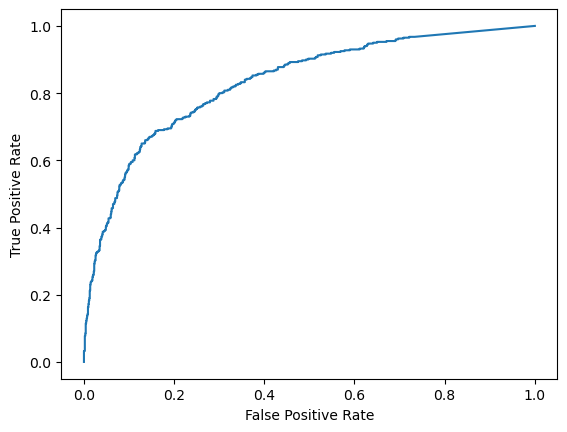

In [50]:
y_pred_proba = optimal_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### C. CALCULATE AUC 

In [51]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8323327552031714
